# 1.importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# 2. Data Collection and processing

In [3]:
df = pd.read_csv("Rainfall.csv")

In [4]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [5]:
df.shape

(366, 12)

In [6]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [8]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [9]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [10]:
# removing extra spaces in all the columns

df.columns = df.columns.str.strip()

In [11]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [12]:
# removing the day column 

df = df.drop(columns=["day"])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


# 3. Handling missing values

In [13]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [14]:
df["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [15]:
df["winddirection"] = df["winddirection"].fillna(df["winddirection"].mode()[0])
df["windspeed"] = df["windspeed"].fillna(df["windspeed"].median())

# winddirection: missing values are replaced with the most common direction
# windspeed: missing values are replaced with the median speed

In [16]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

# 4. converting y / n --> 0 / 1

In [17]:
df["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df["rainfall"] = df["rainfall"].map({"yes": 1, "no": 0})

In [19]:
df["rainfall"]

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 366, dtype: int64

# 5. Exploratory Data Analysis(EDA) 

In [20]:
df.shape

(366, 11)

In [21]:
sns.set(style = "whitegrid")

In [22]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [23]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [24]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

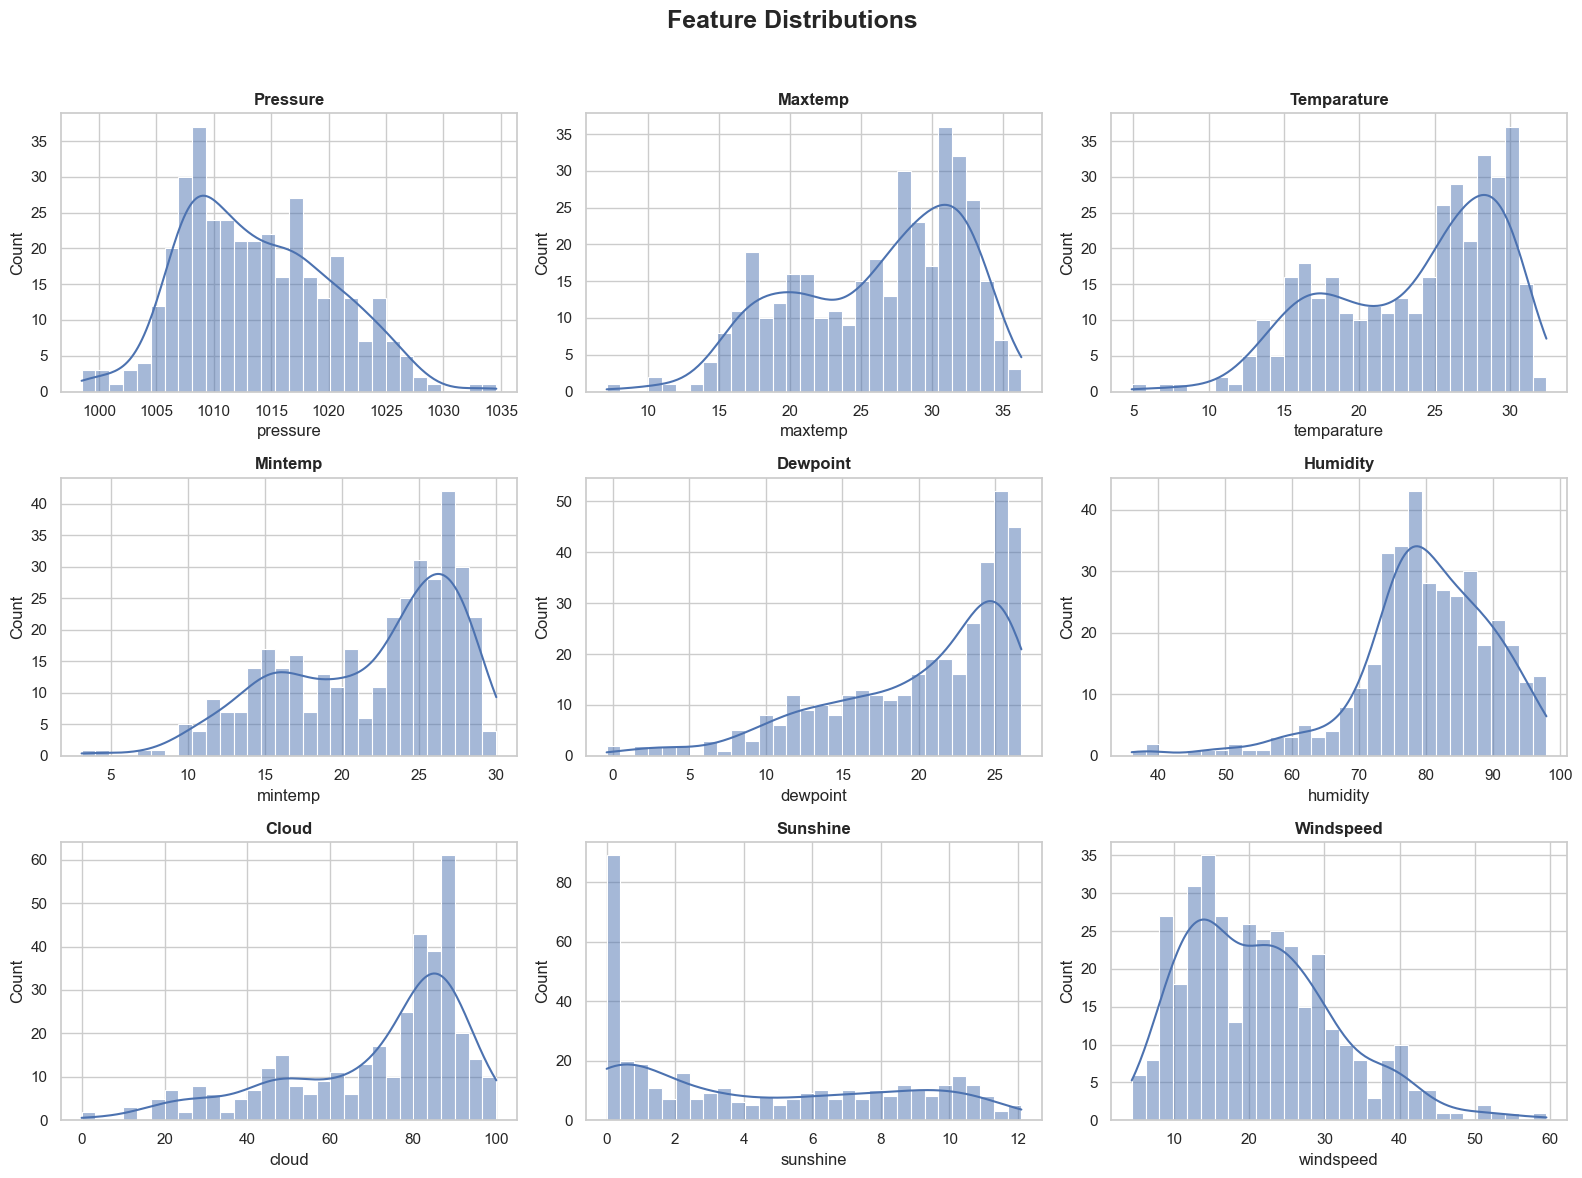

In [25]:
# It loops through the listed columns and places each plot into a 3×3 grid, assigning each column to a separate subplot position (1 to 9).

plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

for i, column in enumerate(
    ['pressure', 'maxtemp', 'temparature', 'mintemp',
     'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(column.capitalize(), fontsize=12, fontweight="bold")
    
    plt.ylabel("Count")

plt.suptitle("Feature Distributions", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


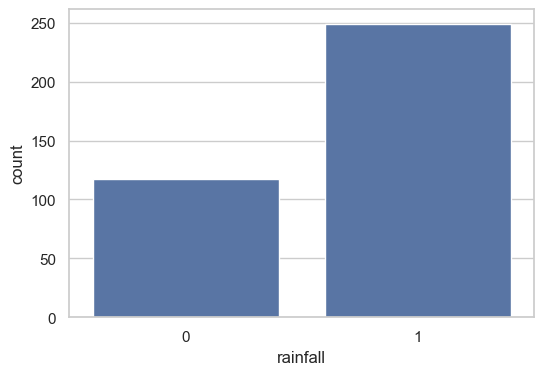

In [26]:
# distribution for rainfall

plt.figure(figsize=(6, 4))
sns.countplot(x = "rainfall",data = df)
plt.show()

In [27]:
# so there is a huge class imbalance in rainfall distribution.

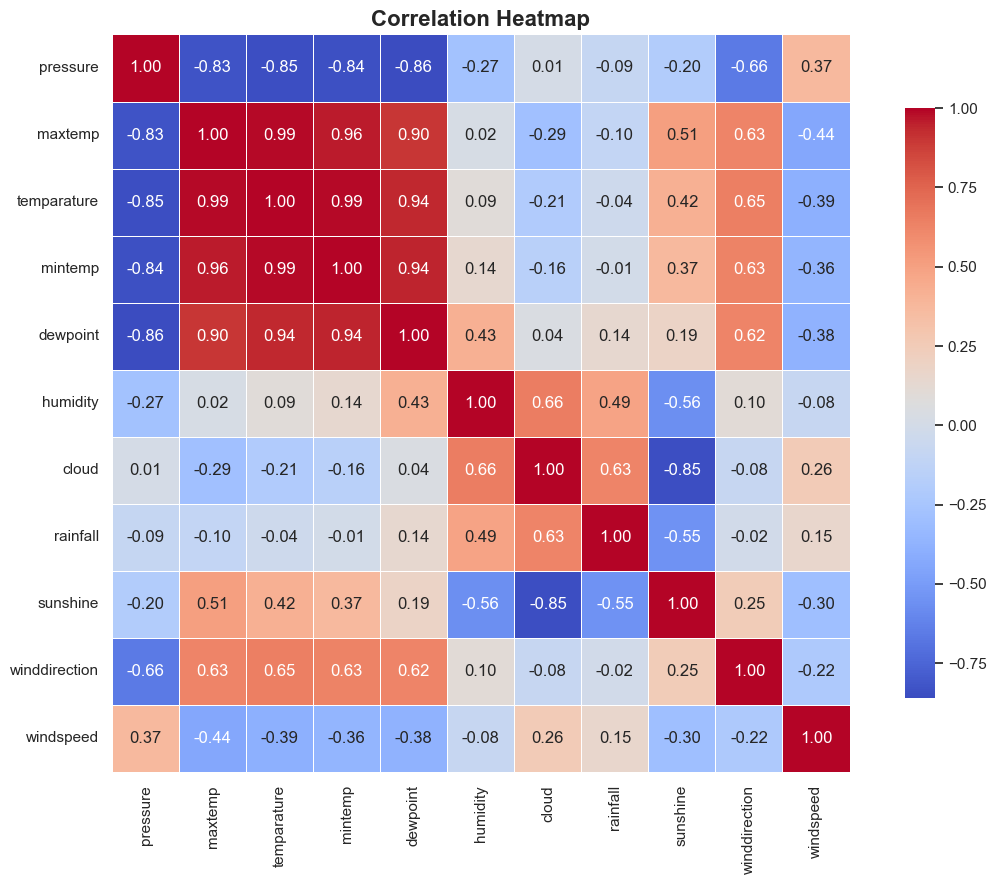

In [28]:
# correlation matrix - It shows how strongly features are related to each other using colors and numbers (from −1 to +1).

plt.figure(figsize=(12, 9))
sns.set_style("white")

sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

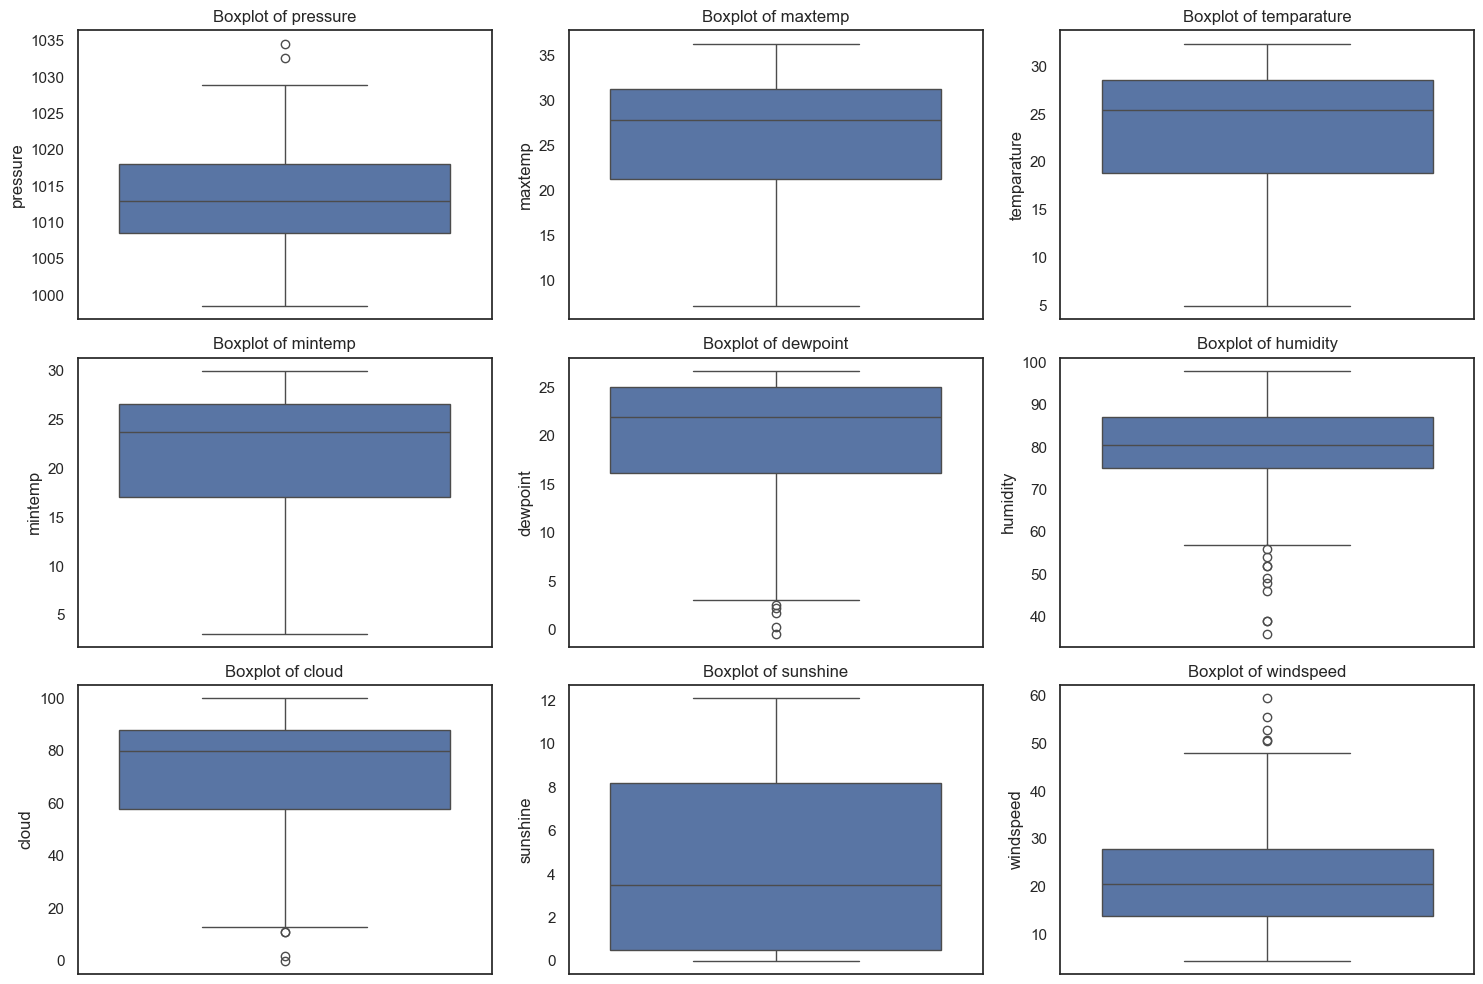

In [29]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

# 6. Data Preprocessing

In [30]:
# dropping highly correlated column - removing the columns that are strongly correlated with another feature to avoid redundancy and prevent issues in models.

df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [31]:
df

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...
361,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,13.3,78,86,1,1.2,20.0,20.9


In [32]:
df["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [33]:
# seperating majority and minority class

df_major = df[df["rainfall"] == 1]
df_minor = df[df["rainfall"] == 0]

In [34]:
df_minor.shape

(117, 8)

In [35]:
df_major.shape

(249, 8)

# Downsampling 

In [36]:
# downsampling 1, 249 values --> 117 values (to match with the values of 0)

In [37]:
df_major_downsample = resample(df_major, replace = False, n_samples=len(df_minor), random_state=42)

In [38]:
df_major_downsample.shape

(117, 8)

In [39]:
df_downsample = pd.concat([df_major_downsample, df_minor])

In [40]:
df_downsample.shape # combination of df_major_downsample, and df_minor

(234, 8)

In [41]:
# shuffling

df_downsample = df_downsample.sample(frac=1, random_state=42).reset_index(drop=True)

In [42]:
df_downsample.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [43]:
df_downsample["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

# 7. Train Test Split

In [44]:
# features --> X
# target --> Y

In [45]:
X = df_downsample.drop(columns=["rainfall"])
Y = df_downsample["rainfall"]

In [46]:
X # features

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,0.0,30.0,28.5
1,1013.4,19.5,69,17,10.5,70.0,12.4
2,1006.1,24.4,74,27,10.8,220.0,8.7
3,1007.6,24.8,85,84,1.8,70.0,34.8
4,1021.2,8.4,66,18,10.1,20.0,24.4
...,...,...,...,...,...,...,...
229,1008.1,25.4,86,75,5.7,20.0,9.5
230,1010.1,19.9,91,89,0.0,70.0,31.8
231,1020.6,14.7,91,88,0.3,50.0,24.4
232,1008.3,24.1,74,29,5.7,10.0,4.4


In [47]:
Y # target (rainfall)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64

In [48]:
# splitting the data into training data and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 8. Random Forest Classifier

# model training

In [49]:
# Random Forest Classifier

rf = RandomForestClassifier(random_state=42)

In [50]:
# It sets up a Random Forest model and a hyperparameter grid to test different settings for the best performance.


rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# 9. Hypertuning (using GridSearch) - performing hyperparameter tuning for the Random Forest model

In [51]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [52]:
# It selects the best Random Forest model found by GridSearchCV.

best_rf = grid_search_rf.best_estimator_

In [53]:
print("Best Parameters for Random Forest :", grid_search_rf.best_params_)

Best Parameters for Random Forest : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


# 10. Model Evaluation

In [54]:
# Performs 5-fold cross-validation on the best Random Forest model
# Prints the scores for each fold and their average

In [55]:
cv_scr = cross_val_score(best_rf, X_train, Y_train, cv=5)
print("Cross-validation scores:", cv_scr)
print("Mean cross-validation score:", np.mean(cv_scr))

Cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean cross-validation score: 0.818918918918919


In [56]:
# Evaluates the best Random Forest model on the test set

# - Accuracy
# - Confusion Matrix
# - Precision, Recall, F1-score (Classification Report)

In [57]:
# test set performance
y_pred = best_rf.predict(X_test)

print("Test set Accuracy:", accuracy_score(Y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



# prediction on the unlabel data

In [58]:
# # Creates a single-row DataFrame with given input values to make a prediction

input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [59]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [60]:
prediction = best_rf.predict(input_df)

In [61]:
prediction

array([1])

In [62]:
# Uses the trained Random Forest model to predict rainfall
# Prints "Rainfall" if predicted class is 1, otherwise "No Rainfall."

prediction = best_rf.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [63]:
# save model and feature names to a pickle file
model_data = {"model": best_rf, "feature_names": X.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

# Load the saved model and file and use it for prediction

In [65]:
import pickle
import pandas as pd

In [66]:
# load the trained model and feature names from the pickle file
with open("rainfall_prediction_model.pkl", "rb") as file:
  model_df = pickle.load(file)

In [68]:
model = model_df["model"]
feature_names = model_df["feature_names"]

In [84]:
input_df = (1015.9, 19.9, 23, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_names)

In [85]:
prediction = best_rf.predict(input_df)
print("Prediction :", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction : Rainfall
